In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.plotly as py

In [2]:
df1= pd.read_csv('retail1.csv')
df2= pd.read_csv('retail2.csv')
df3= pd.read_csv('retail3.csv')


In [3]:
yo= df2.merge(df1,on=['Store','Date','IsHoliday'])

In [4]:
df4=yo.merge(df3,on=['Store'])

In [5]:
df4['Date']=pd.to_datetime(df4['Date'],dayfirst=True,format="%d/%m/%Y")

In [6]:
ws=df4.groupby('Date')[['Weekly_Sales']].sum()
data = [go.Scatter(x=ws.index, y=ws.values,line = dict(color = '#17BECF'),
                opacity = 1,fill='tozeroy')]
layout = go.Layout(
    title='Time Series of Weekly Sales',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(range=[30000000, 90000000],
        title='Sales in $',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-retail2')

In [7]:
ws1=(ws.nsmallest(20,columns='Weekly_Sales')).sort_values(by='Weekly_Sales')

In [8]:
trace1 = go.Bar(
    marker=dict(
        color='#EF718E'),
    x=ws1.index,
    y=ws1.Weekly_Sales,
    
)
data = [trace1]
layout = go.Layout(
    title= '20 Lowest Weekly Sales',xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales in $',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='retail5')

In [9]:
ws2=(ws.nlargest(20,columns='Weekly_Sales')).sort_values(by='Weekly_Sales')

In [10]:
trace1 = go.Bar(
    marker=dict(
        color='#17BECF'),
    x=ws2.index,
    y=ws2.Weekly_Sales,
    
)
data = [trace1]
layout = go.Layout(
    title= 'Top 20 Weekly Sales',xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales in $',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='retail3')

In [11]:
trace1 = go.Bar(
    marker=dict(
        color='#17BECF'),
    x=ws2.index,
    y=ws2.Weekly_Sales,
    name='Top20 Weekly Sales'
    
)
trace2 = go.Bar(
    marker=dict(
        color='#EF718E'),
    x=ws1.index,
    y=ws1.Weekly_Sales,
    name='Lowest20 Weekly Sales')
data = [trace1,trace2]
layout = go.Layout(barmode='group',
    title= 'Top 20 & Lowest 20 Weekly Sales',xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales in $',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='retail4')

In [12]:
temp=df4.groupby('Date')[['Temperature']].mean()
data = [go.Scatter(x=temp.index, y=temp.values,line = dict(color = '#FDBECF'),
                opacity = 1,fill='tozeroy')]
layout = go.Layout(
    title='Time Series of Temperature',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Temperature in F',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-retail6')

In [13]:
temp1=df4.groupby('Date')[['Fuel_Price']].mean()

In [14]:
data = [go.Scatter(x=temp1.index, y=temp1.values,line = dict(color = '#B5BECF'),
                opacity = 1,fill='tozeroy')]
layout = go.Layout(
    title='Time Series of Fuel Price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price in $',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-retail6')

In [15]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [16]:
temp2=df4.groupby('Date')[['CPI']].mean()
data = [go.Scatter(x=temp2.index, y=temp2.values,line = dict(color = '#CEBECF'),
                opacity = 1,fill='tozeroy')]
layout = go.Layout(
    title='Time Series of Avg Consumer Price Index',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(range=[160,180],
        title='CPI',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-retail66')

In [17]:
df4.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [18]:
st=df4.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

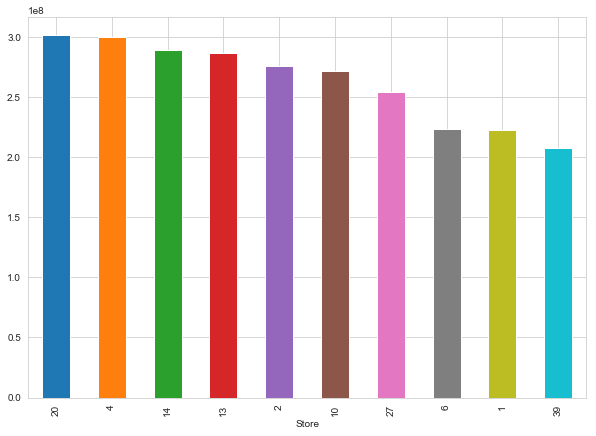

In [19]:
plt.figure(figsize=(10,7))
st.plot(kind='bar')

In [20]:
## Top 5 stores by Volume of Sales 

In [21]:
temp3=df4.groupby('Date')[['Unemployment']].mean()
data = [go.Scatter(x=temp3.index, y=temp3.values,line = dict(color = '#AE6ECF'),
                opacity = 1,fill='tozeroy')]
layout = go.Layout(
    title='Time Series of Avg Unemployment Rate',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(range=(6,9),
        title='Rate',
        
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-retail66')

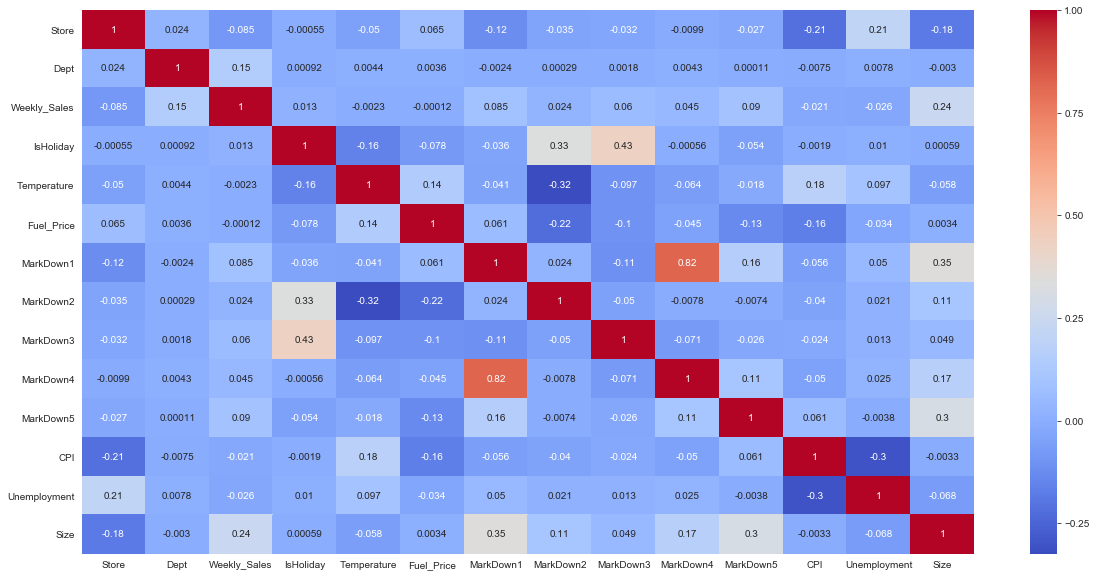

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(),cmap='coolwarm',annot=True)

In [23]:
df4.corr()['Weekly_Sales']

Store          -0.085195
Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.085251
MarkDown2       0.024130
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown5       0.090362
CPI            -0.020921
Unemployment   -0.025864
Size            0.243828
Name: Weekly_Sales, dtype: float64

In [24]:
## Pearson Correlation of .243828 from Size is the highest for Weekly_Sales. 
## Size is correlated with Weekly_Sales volume which makes sense
## Pearson Correlation of .148032 for Dept shows that some Depts are correlated with Sale volumes
## All Markdowns appear to have a positive impact on Weekly_Sales, however small magnitude

In [25]:
ty=df4.groupby('Date')[['Temperature', 'Fuel_Price',
                        'CPI', 'Unemployment','MarkDown1',
                        'MarkDown2', 'MarkDown3', 'MarkDown4',
                        'MarkDown5']].mean()

In [26]:
tyd=df4.groupby('Date')['Weekly_Sales'].sum()

In [27]:
tyd=tyd.to_frame(name=None)

In [28]:
tyd=tyd.reset_index()

In [29]:
ty=ty.reset_index()

In [30]:
new=ty.merge(tyd,on='Date')

In [31]:
new.corr()['Weekly_Sales']

Temperature    -0.158603
Fuel_Price     -0.056371
CPI             0.027008
Unemployment    0.003443
MarkDown1      -0.127415
MarkDown2      -0.131404
MarkDown3       0.466803
MarkDown4      -0.064021
MarkDown5       0.040427
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [32]:
newd= new[(new['Date'] > '2011-11-04')]
newd.corr()['Weekly_Sales']

Temperature    -0.225351
Fuel_Price     -0.328561
CPI            -0.390841
Unemployment    0.434163
MarkDown1      -0.127415
MarkDown2      -0.131404
MarkDown3       0.466803
MarkDown4      -0.064021
MarkDown5       0.040427
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [33]:
newd.head(3)

,Date,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
92,2011-11-11,48.751096,3.490790,172.839244,7.771350,11445.650530,9651.876408,317.731020,4174.938448,4952.209369,48474224.75
93,2011-11-18,51.778818,3.488789,173.103390,7.761937,6317.023783,690.925021,117.909290,818.983472,5904.887670,46438980.56
94,2011-11-25,49.118040,3.435080,173.193448,7.761737,587.152547,213.626845,61817.075106,70.420365,1903.981198,66593605.26


In [44]:
trace_1 = go.Scatter(
                x=newd['Date'],
                y=newd['MarkDown1'],
                name = "MarkDown1",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_2 = go.Scatter(
                x=newd['Date'],
                y=newd['MarkDown2'],
                name = "MarkDown2",
                line = dict(color = '#ff7f0e'),
                opacity = 0.8)
trace_3 = go.Scatter(
                x=newd['Date'],
                y=newd['MarkDown3'],
                name = "MarkDown3",
                line = dict(color = '#C19EDF'),
                opacity = 0.8)
trace_4 = go.Scatter(
                x=newd['Date'],
                y=newd['MarkDown4'],
                name = "MarkDown4",
                line = dict(color = '#F1C9DF'),
                opacity = 0.8)
trace_5 = go.Scatter(
                x=newd['Date'],
                y=newd['MarkDown5'],
                name = "MarkDown5",
                line = dict(color = '#3E1CDF'),
                opacity = 0.8)

data= [trace_1,trace_2,trace_3,trace_4,trace_5]
layout = go.Layout(
    title='Time Series of Avg MarkDowns',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='MarkDown',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-highnlow-ssss')

In [35]:
trace_1 = go.Scatter(
                x=newd['Date'],
                y=newd['Weekly_Sales'],
                name = "MarkDown1",
                line = dict(color = '#17BECF'),
                opacity = 0.8,fill='tozeroy')



data= [trace_1]
layout = go.Layout(
    title='Time Series of Weekly Sales(Nov,2011 Onwards)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(range=(20000000,80000000),
        title='Sales in $',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-highnlow-sss4s')